# **Valorisation des entreprises**

Dans ce travail nous allons se baser sur la dataset "Screening_Capital_IQ" contenant les informations financières de plusieurs entreprises, pour développer un modèle de clustering pour les structurer en groupe, Les entreprises presentes dans chaque groupe s'appellent des comparables. 

### **Importation des packages**

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, pairwise_distances, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import MiniBatchKMeans


### **Importation de la base de données**

In [122]:
Data = pd.read_excel ('Data/Screening_Capital_IQ.xls')


In [123]:
Data.head()

,Target/Issuer,"Total Transaction Value ($USDmm, Historical rate)",Buyers/Investors,Business Description [Target/Issuer],EBITDA Margin % Capital IQ [LTM] [Target/Issuer],Implied Enterprise Value/EBIT (x),1Year Change in Long Term Debt to Avg Total Assets (Universe: S&P 500) (Cross Sectional Rank) [Target/Issuer],Est. Annual EBITDA Growth 2 Yr % Capital IQ [Latest] (%) [Target/Issuer],"% Change Last 18 Months, Revenue Capital IQ [FY+1] (%) [Target/Issuer]",Industry Classifications [Target/Issuer],...,Current Ratio Capital IQ [CY 2025] [Target/Issuer],Quick Ratio Capital IQ [CY 2020] [Target/Issuer],Quick Ratio Capital IQ [CY 2021] [Target/Issuer],Quick Ratio Capital IQ [CY 2022] [Target/Issuer],Return on Capital % Compustat [CY 2020] [Target/Issuer],Return on Capital % Compustat [CY 2021] [Target/Issuer],Return on Capital % Compustat [CY 2022] [Target/Issuer],Return on Capital % Compustat [CY 2023] [Target/Issuer],Return on Capital % Compustat [CY 2024] [Target/Issuer],Return on Capital % Compustat [CY 2025] [Target/Issuer]
0,"Bath & Body Works, Inc. (NYSE:BBWI)",298.72,NaN,"Bath & Body Works, Inc. operates a specialty r...",21.1,NaN,99,3.32,14.8,Consumer Discretionary (Primary),...,NaN,1.32,1.72,1.06,12.4,18.9,20.6,NaN,NaN,NaN
1,"Bath & Body Works, Inc. (NYSE:BBWI)",350.00,NaN,"Bath & Body Works, Inc. operates a specialty r...",21.1,NaN,99,3.32,14.8,Consumer Discretionary (Primary),...,NaN,1.32,1.72,1.06,12.4,18.9,20.6,NaN,NaN,NaN
2,"Bath & Body Works, Inc. (NYSE:BBWI)",500.00,NaN,"Bath & Body Works, Inc. operates a specialty r...",21.1,NaN,99,3.32,14.8,Consumer Discretionary (Primary),...,NaN,1.32,1.72,1.06,12.4,18.9,20.6,NaN,NaN,NaN
3,"Bath & Body Works, Inc. (NYSE:BBWI)",150.00,NaN,"Bath & Body Works, Inc. operates a specialty r...",21.1,NaN,99,3.32,14.8,Consumer Discretionary (Primary),...,NaN,1.32,1.72,1.06,12.4,18.9,20.6,NaN,NaN,NaN
4,"Bath & Body Works, Inc. (NYSE:BBWI)",1000.00,NaN,"Bath & Body Works, Inc. operates a specialty r...",21.1,NaN,99,3.32,14.8,Consumer Discretionary (Primary),...,NaN,1.32,1.72,1.06,12.4,18.9,20.6,NaN,NaN,NaN


In [124]:
Data.shape

(10000, 52)

In [125]:
Data.columns

Index(['Target/Issuer', 'Total Transaction Value ($USDmm, Historical rate)',
       'Buyers/Investors', 'Business Description [Target/Issuer]',
       'EBITDA Margin %  Capital IQ [LTM] [Target/Issuer]',
       'Implied Enterprise Value/EBIT (x)',
       '1Year Change in Long Term Debt to Avg Total Assets (Universe: S&P 500) (Cross Sectional Rank) [Target/Issuer]',
       'Est. Annual EBITDA Growth  2 Yr %  Capital IQ [Latest] (%) [Target/Issuer]',
       '% Change Last 18 Months, Revenue  Capital IQ [FY+1] (%) [Target/Issuer]',
       'Industry Classifications [Target/Issuer]',
       'Implied Enterprise Value/Revenues (x)',
       'Geographic Locations [Target/Issuer]',
       'Debt to Assets Ratio (Universe: S&P 500) (Cross Sectional Rank) [Target/Issuer]',
       'EBITDA, 1 Yr Growth %  Capital IQ [LTM] (%) [Target/Issuer]',
       'EBIT, 3 Yr CAGR %  Capital IQ [CY 2022] (%) [Target/Issuer]',
       'EBIT, 3 Yr CAGR %  Capital IQ [CY 2023] (%) [Target/Issuer]',
       'EBIT, 3 Yr 

In [126]:
#Les valeurs nulles 
isnull = Data.isnull().sum()
isnull

Target/Issuer                                                                                                                          0
Total Transaction Value ($USDmm, Historical rate)                                                                                   1735
Buyers/Investors                                                                                                                    9308
Business Description [Target/Issuer]                                                                                                   0
EBITDA Margin %  Capital IQ [LTM] [Target/Issuer]                                                                                      0
Implied Enterprise Value/EBIT (x)                                                                                                   9937
1Year Change in Long Term Debt to Avg Total Assets (Universe: S&P 500) (Cross Sectional Rank) [Target/Issuer]                          0
Est. Annual EBITDA Growth  2 Yr %  Capita

In [127]:
#Les colonnes contenant 100% de valeurs nulles
columns_null = isnull[isnull == 10000].index
columns_null

Index(['EBIT, 3 Yr CAGR %  Capital IQ [CY 2023] (%) [Target/Issuer]',
       'EBIT, 3 Yr CAGR %  Capital IQ [CY 2024] (%) [Target/Issuer]',
       'EBIT, 3 Yr CAGR %  Capital IQ [CY 2025] (%) [Target/Issuer]',
       '5 Yr Hist Rel EBITDA to Enterprise Value (Universe: BMI  EAFE Small Cap) (Cross Sectional Rank) [Target/Issuer]',
       'Return on Assets %  Capital IQ [CY 2023] [Target/Issuer]',
       'Return on Assets %  Capital IQ [CY 2024] [Target/Issuer]',
       'Return on Assets %  Capital IQ [CY 2025] [Target/Issuer]',
       'Levered Free Cash Flow Margin %  Capital IQ [CY 2023] [Target/Issuer]',
       'Levered Free Cash Flow Margin %  Capital IQ [CY 2024] [Target/Issuer]',
       'Levered Free Cash Flow Margin %  Capital IQ [CY 2025] [Target/Issuer]',
       'Avg. Cash Conversion Cycle  Capital IQ [CY 2023] (Days) [Target/Issuer]',
       'Current Ratio  Capital IQ [CY 2023] [Target/Issuer]',
       'Current Ratio  Capital IQ [CY 2024] [Target/Issuer]',
       'Current Ratio

In [128]:
#Supprimons ces colonnes (Contenant 100% de valeurs nulles) de notre base de données
Data = Data.drop (columns_null, axis = 1)

Dans un premier temps nous allons pas travailler avec les colonnes contenat l'EV

In [129]:
#Supprions les colonnes de EV/EBIT et EV/Revenues parce qu'ils ne serons pas utile dans cette première classification
EV = ['Implied Enterprise Value/EBIT (x)','Implied Enterprise Value/Revenues (x)']
Data = Data.drop (EV, axis = 1)

In [130]:
print ( "Taille de la data après suppression de ces colonnes",  Data.shape)

Taille de la data après suppression de ces colonnes (10000, 33)


In [131]:
#Extraction de cette base de données
#Data.to_excel('Data_V1.xlsx', index = False)

### **Analyse Exploratoire et nettoyage des données**

In [132]:
#La taille de la dataset
print ('Nombre de colonnes : ' + str(Data.shape[1]))
print ('Nombre de lignes : ' + str(Data.shape[0]))

Nombre de colonnes : 33
Nombre de lignes : 10000


In [133]:
#Nombre d'entreprise présentes dans la base de données
print ( ''' Le nombre d'entreprise : ''', len (Data['Target/Issuer'].value_counts().index))

 Le nombre d'entreprise :  169


In [134]:
#Nombre des dupliquées
print ('Le nombre de lignes dupliquées : ', Data.duplicated().sum())

Le nombre de lignes dupliquées :  1930


In [135]:
#Supprimant les dupliquées
Data = Data.drop_duplicates()
print ( 'Nombre de dupliquées après suppression de tout les duppliquées : ', Data.duplicated().sum())
print ('Taille de la data après suppression des dupliquées : ', Data.shape)

Nombre de dupliquées après suppression de tout les duppliquées :  0
Taille de la data après suppression des dupliquées :  (8070, 33)


In [136]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8070 entries, 0 to 9999
Data columns (total 33 columns):
 #   Column                                                                                                                           Non-Null Count  Dtype         
---  ------                                                                                                                           --------------  -----         
 0   Target/Issuer                                                                                                                    8070 non-null   object        
 1   Total Transaction Value ($USDmm, Historical rate)                                                                                7513 non-null   float64       
 2   Buyers/Investors                                                                                                                 529 non-null    object        
 3   Business Description [Target/Issuer]                           

In [137]:
#Le nombre d'investisseur dans la dataset
print ( "Le nombre d'investisseurs dans la dataset : ", Data['Buyers/Investors'].value_counts().count())
# print (Data[Data['Buyers/Investors'] == "Barington Capital Group, L.P." ])

Le nombre d'investisseurs dans la dataset :  302


Il y a des investisseurs qu'ont investit dans plusieurs entreprises.

In [138]:
print ( "Nombre de secteur : ", Data['Industry Classifications [Target/Issuer]'].value_counts().count())

Nombre de secteur :  11


### **la data "Company Screening Report FINpack.xls"**

#### Preparation des données

In [139]:
df = pd.read_excel('Data/Company Screening Report FINpack.xls')
df.shape

(20425, 122)

In [140]:
#Nombre d'entreprise dans la data set
print ( ''' Le nombre d'entreprise dans la dataset est : ''', df['Company Name'].value_counts().count())

 Le nombre d'entreprise dans la dataset est :  20415


In [141]:
#Nombre de valeur nulles
valeur_nulle = df.isnull().sum()

Text(0.5, 1.0, 'Nombre de valeur nulle de chaque colonne')

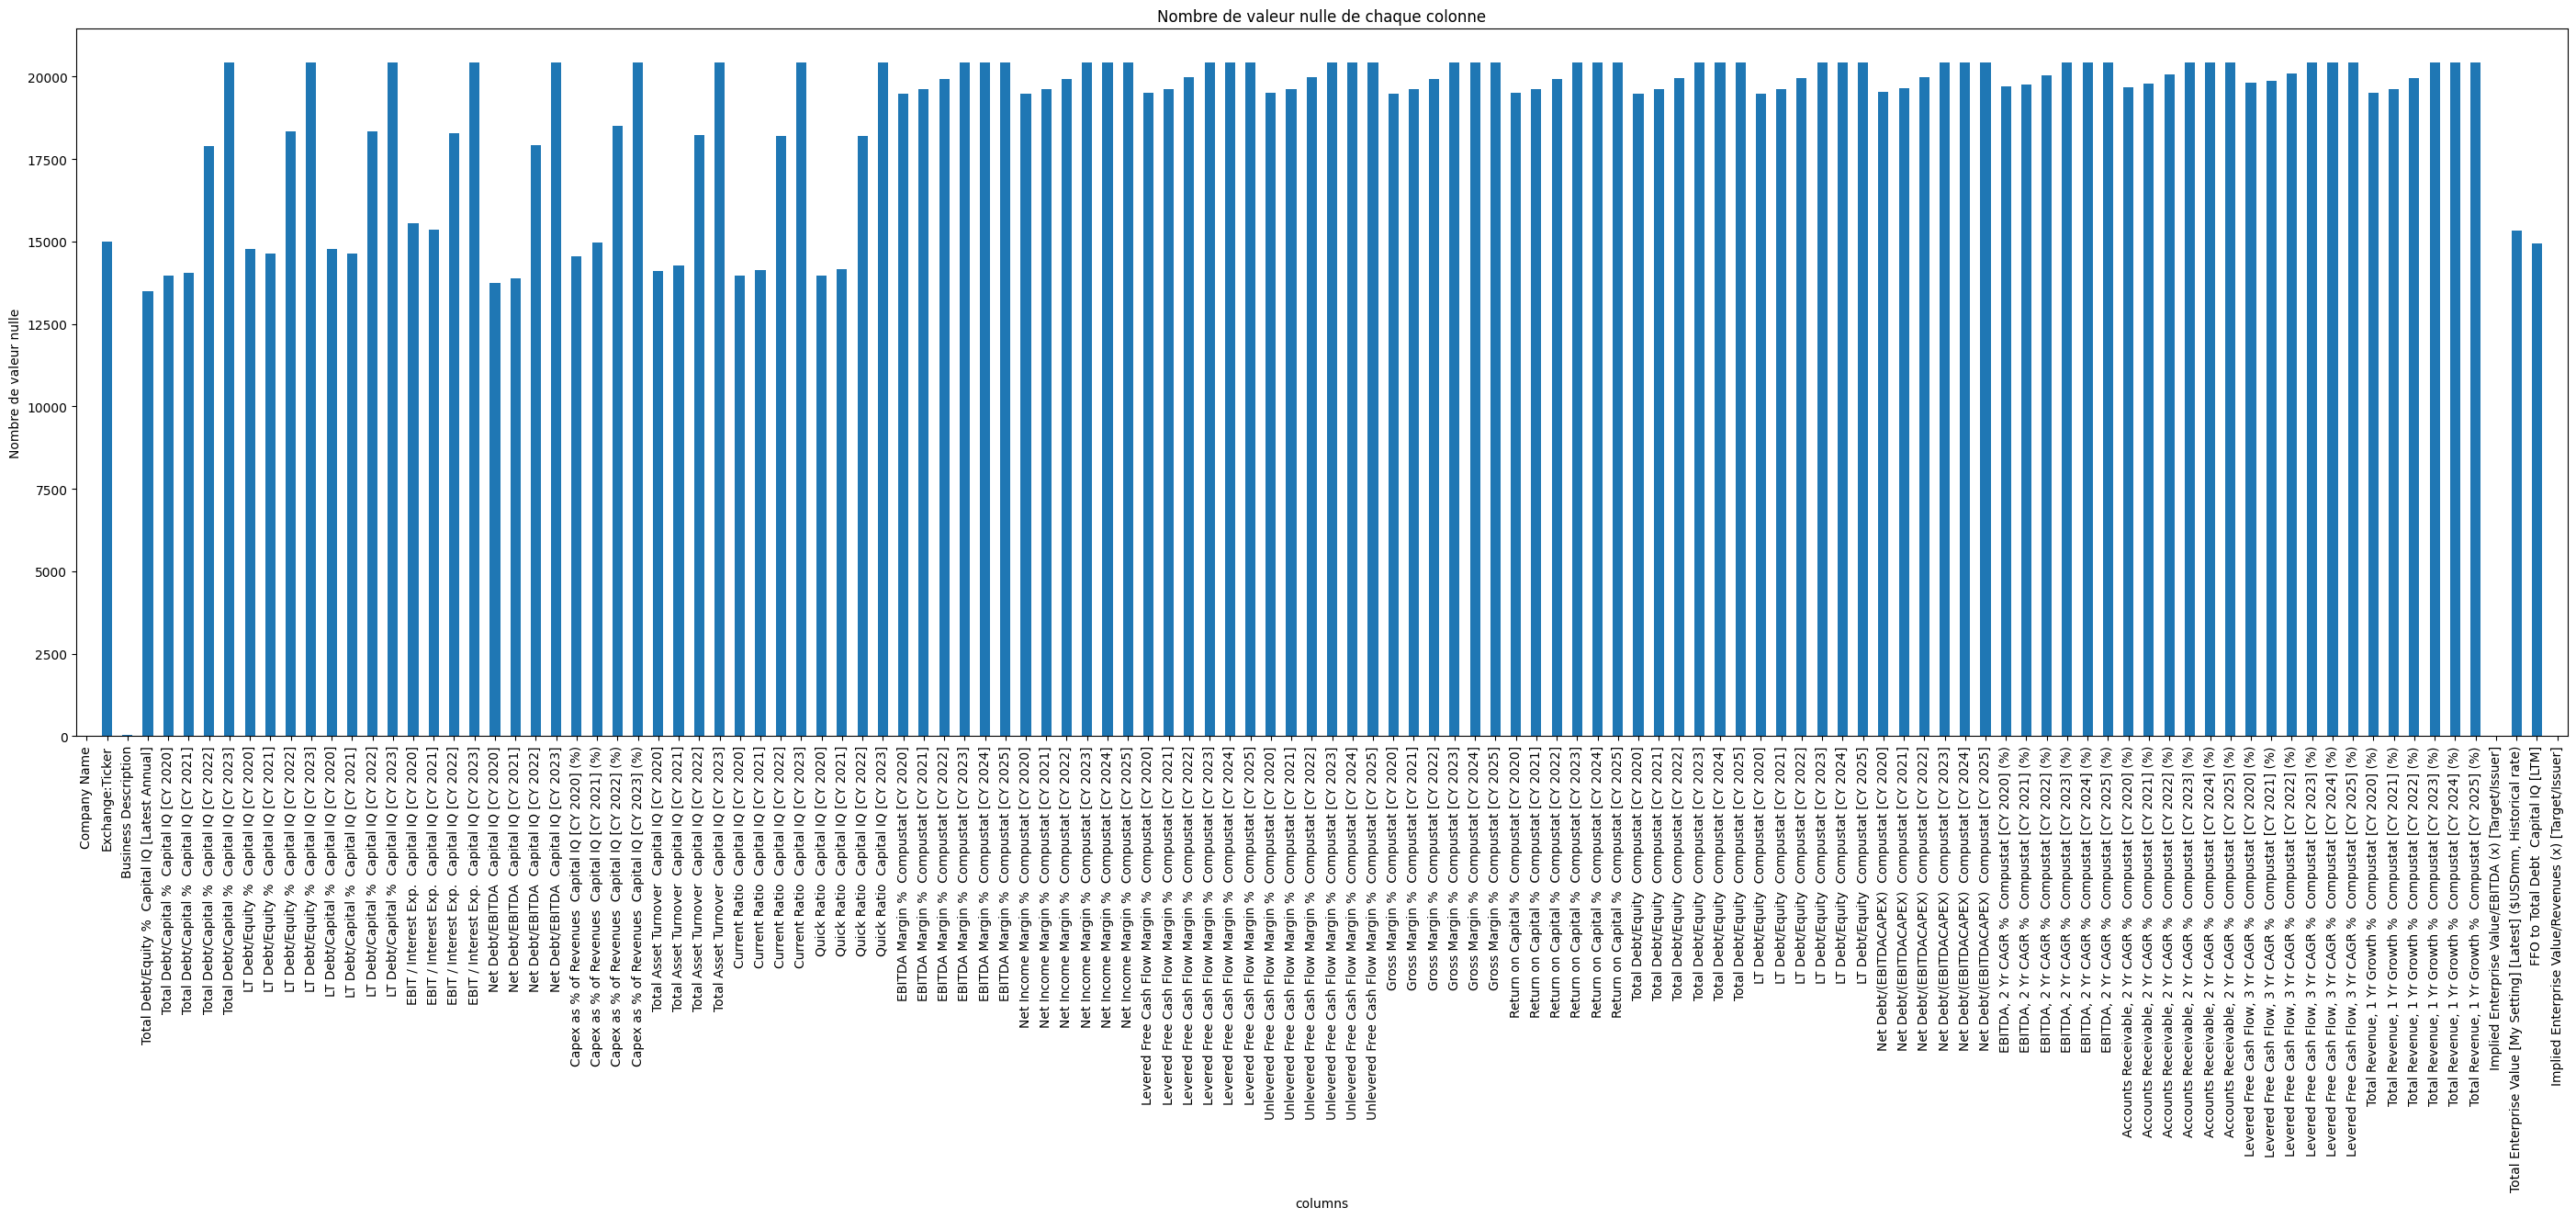

In [142]:
#Nombre de valeur nulle de chaque colonne
fig1 = valeur_nulle.plot (kind = 'bar', figsize = (35,10), fontsize = 10)
plt.xlabel ('columns')
plt.ylabel ('Nombre de valeur nulle')
plt.title ('Nombre de valeur nulle de chaque colonne')
#plt.savefig('Nombre de valeur nulle de chaque colonne.png')

In [143]:
print ( 'Nombre de colonnes dont 50% sont des valeurs nulles: ', valeur_nulle[valeur_nulle >= 10000].count())

Nombre de colonnes dont 50% sont des valeurs nulles:  118


In [144]:
#Synthèse de valeurs nulles 
nval = df.shape[0]*df.shape[1]
nnull = df.isnull().sum().sum()
print ('Pourcentage de valeur nulles dans la data = ' + str (nnull*100 / nval) + '%'  )

Pourcentage de valeur nulles dans la data = 89.56738969039067%


<AxesSubplot: >

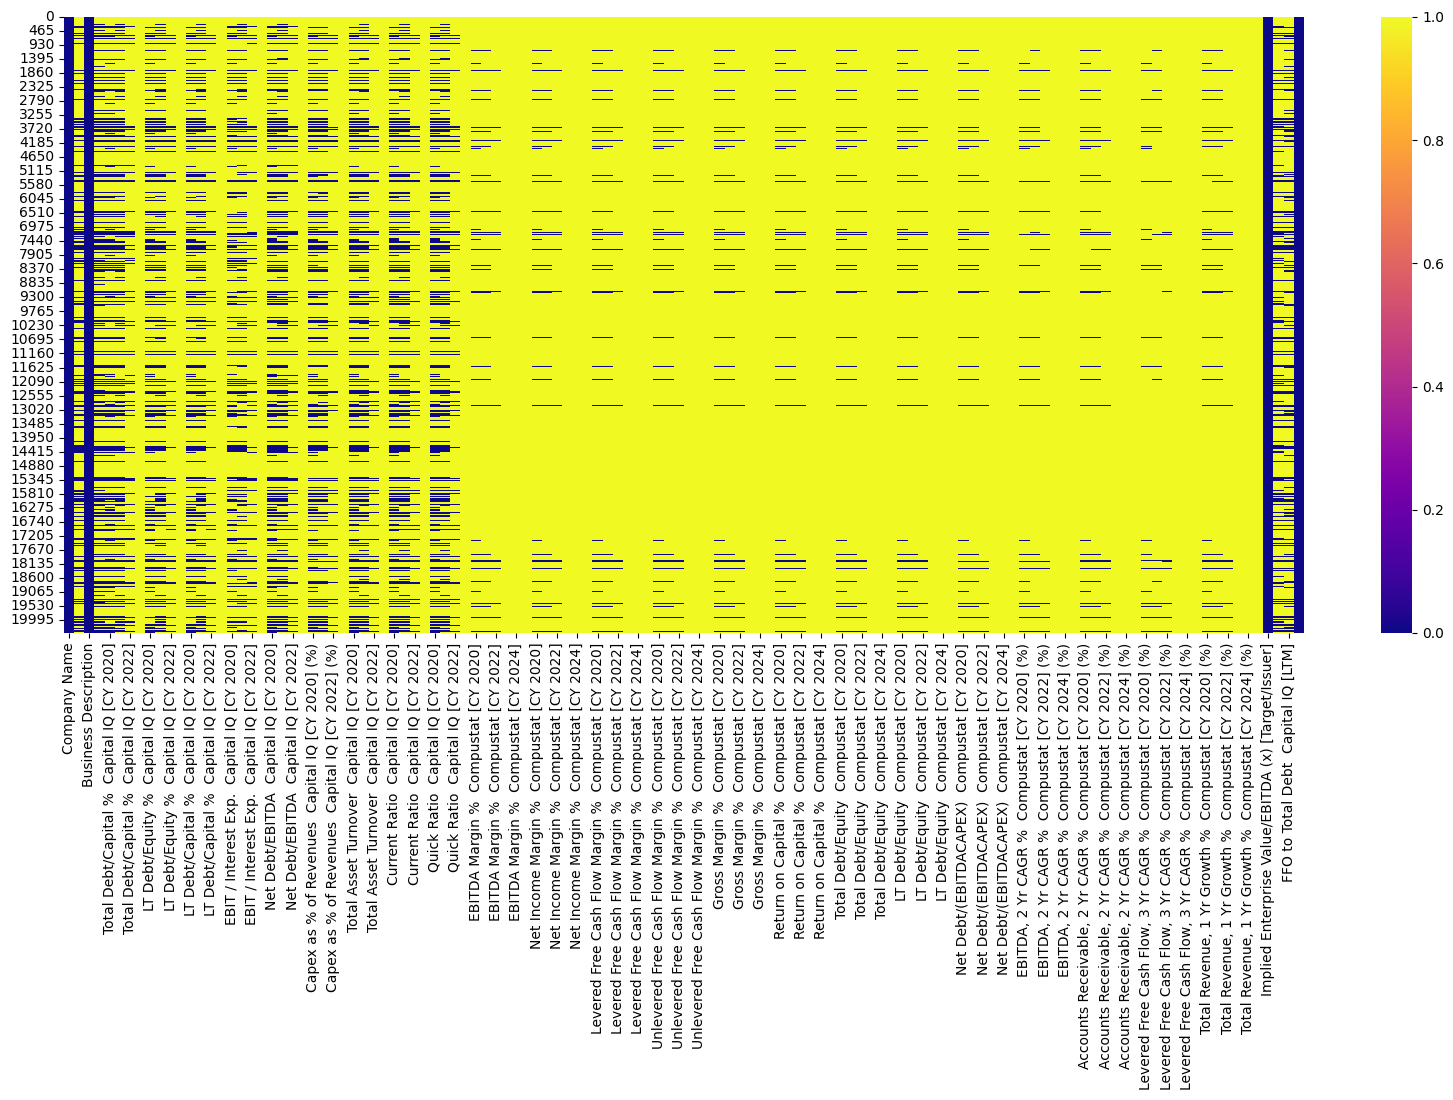

In [145]:
#Visualisons les valeurs nulles | en jaune les valeurs nulles 
fig2 = plt.subplots(figsize = (20, 8))
sns.heatmap(df.isnull(), cmap='plasma')

In [146]:
#Supprimant les les colonnes contenant plus de 15000 valeurs nulles
colonnes_a_supprimer = valeur_nulle[valeur_nulle >= 15000].index
df_V1 = df.drop (colonnes_a_supprimer, axis = 1)
print ( 'La taille de df_V1 (df après suppression des colonnes avec plus de 15000 valeurs nulles) est :',  df_V1.shape)

La taille de df_V1 (df après suppression des colonnes avec plus de 15000 valeurs nulles) est : (20425, 23)


In [147]:
#Nombre de valeurs nulles par colonnes
df_V1.isnull().sum()

Company Name                                                 0
Exchange:Ticker                                          14994
Business Description                                        40
Total Debt/Equity %  Capital IQ [Latest Annual]          13504
Total Debt/Capital %  Capital IQ [CY 2020]               13965
Total Debt/Capital %  Capital IQ [CY 2021]               14050
LT Debt/Equity %  Capital IQ [CY 2020]                   14776
LT Debt/Equity %  Capital IQ [CY 2021]                   14636
LT Debt/Capital %  Capital IQ [CY 2020]                  14775
LT Debt/Capital %  Capital IQ [CY 2021]                  14636
Net Debt/EBITDA  Capital IQ [CY 2020]                    13731
Net Debt/EBITDA  Capital IQ [CY 2021]                    13871
Capex as % of Revenues  Capital IQ [CY 2020] (%)         14557
Capex as % of Revenues  Capital IQ [CY 2021] (%)         14970
Total Asset Turnover  Capital IQ [CY 2020]               14107
Total Asset Turnover  Capital IQ [CY 2021]             

In [148]:
#Fonction (input = DataFrame) --------------> output = Pourcentage de valeurs nulles dans la DataFrame
def pourcentage_na(df_V1) : 
    nval_V1 = df_V1.shape[0]*df_V1.shape[1]
    nnull_V1 = df_V1.isnull().sum().sum()
    print ('Pourcentage de valeur nulles dans la data set est :  ', nnull_V1*100 / nval_V1, '%'  ) 

In [149]:
#Synthèse de valeurs nulles Dans la df_V1
pourcentage_na (df_V1)

Pourcentage de valeur nulles dans la data set est :   57.90069714224895 %


In [150]:
#Supprimons touts les valeurs nulles
df_V2 = df_V1.dropna(axis = 0)
print ( 'Taille de df_V2 (df_V1 après suppression de tous les valeurs nulles) est :', df_V2.shape)

Taille de df_V2 (df_V1 après suppression de tous les valeurs nulles) est : (3568, 23)


In [151]:
#Nouveau nombre d'entreprise 
print ('''Nouveau nombre d'entreprise dans df_V2 est : ''', df_V2['Company Name'].value_counts().count())

Nouveau nombre d'entreprise dans df_V2 est :  3568


In [152]:
#Exportation de la dataset df_V2
#df_V2.to_excel('df_V2.xlsx', index = False)

In [153]:
df_V2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3568 entries, 15 to 20408
Data columns (total 23 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Company Name                                           3568 non-null   object 
 1   Exchange:Ticker                                        3568 non-null   object 
 2   Business Description                                   3568 non-null   object 
 3   Total Debt/Equity %  Capital IQ [Latest Annual]        3568 non-null   object 
 4   Total Debt/Capital %  Capital IQ [CY 2020]             3568 non-null   object 
 5   Total Debt/Capital %  Capital IQ [CY 2021]             3568 non-null   object 
 6   LT Debt/Equity %  Capital IQ [CY 2020]                 3568 non-null   object 
 7   LT Debt/Equity %  Capital IQ [CY 2021]                 3568 non-null   object 
 8   LT Debt/Capital %  Capital IQ [CY 2020]       

Il ya des colonnes de type 'Objetct' qui deverons etre normalement de type 'float', cela est causé par certain valeur abérantes dans la dataset (NM), nous alons supprimer ces valeurs utilisant excel et puis reimporter la data 

In [154]:
df_V3 = pd.read_excel('df_V2.xlsx')
df_V3.shape

(3568, 23)

In [155]:
#Trouvons les lignes, de la dataset df_V3, dans lesquelles plus de 10 de valeurs sont nulles
nbr_lignes_nulles = 0
for i in range (df_V3.shape[0]):
    if df_V3.iloc[i].isnull().sum() >= 10:
        nbr_lignes_nulles+=1
print ('le nombre de lignes dans lesquels plus de 10 valeurs sont nulles est : ', nbr_lignes_nulles)

le nombre de lignes dans lesquels plus de 10 valeurs sont nulles est :  0


In [156]:
#Pourcentage de valeur nulles dans la dataset df_V3
pourcentage_na (df_V3)

Pourcentage de valeur nulles dans la data set est :   1.482988886722558 %


<AxesSubplot: >

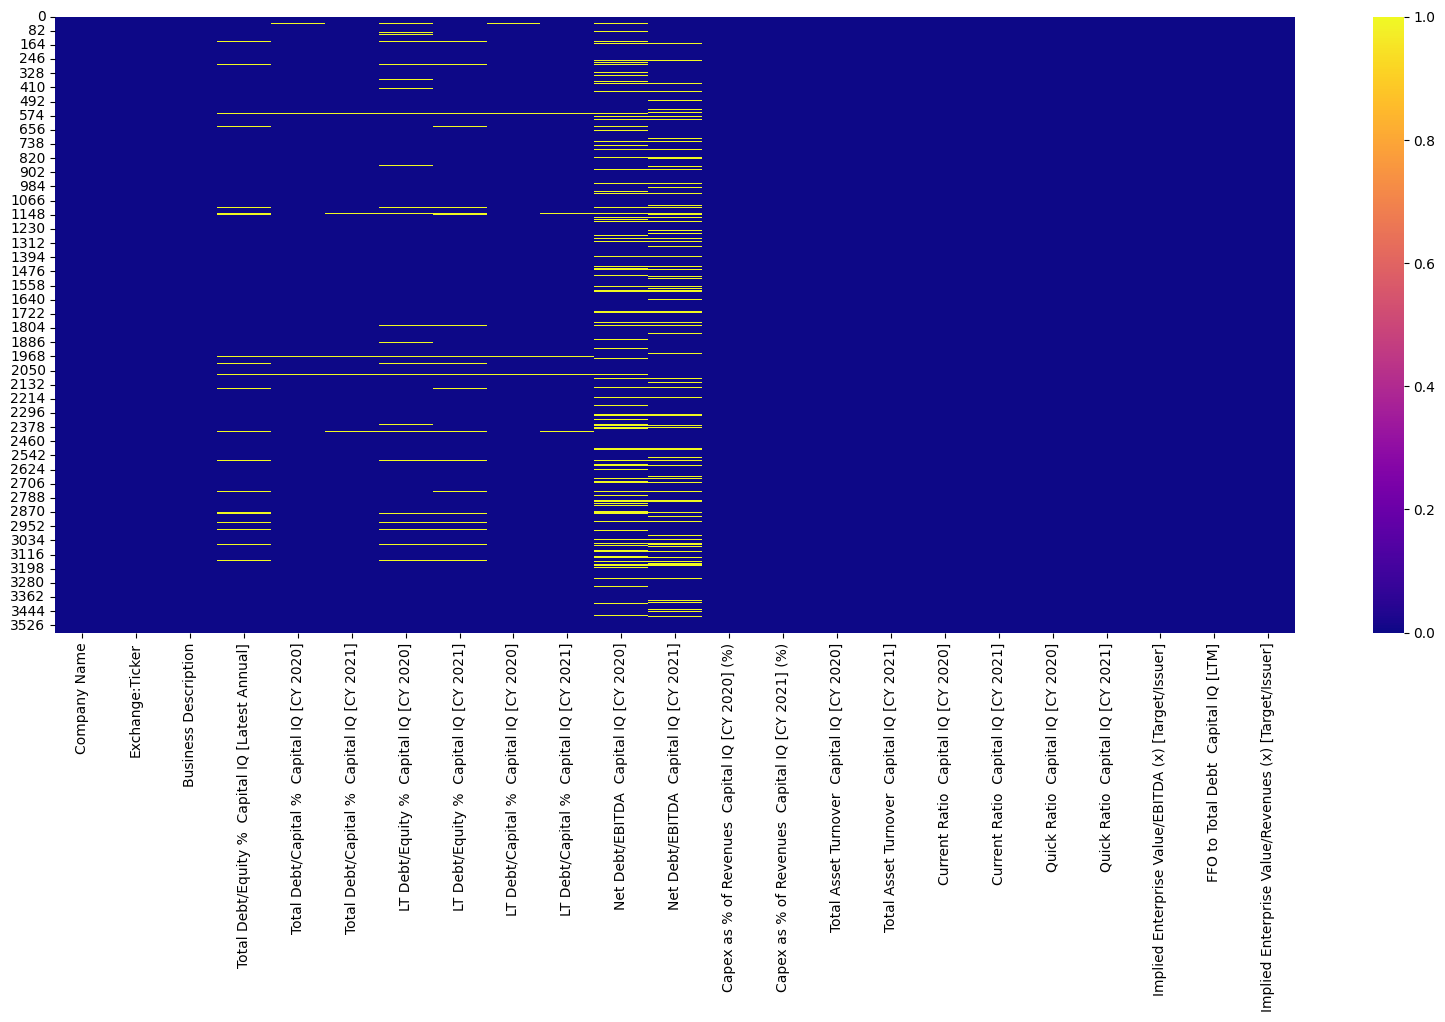

In [157]:
#Visualisons les valeurs nulles | en jaune les valeurs nulles 
fig2 = plt.subplots(figsize = (20, 8))
sns.heatmap(df_V3.isnull(), cmap='plasma')

In [158]:
#df_V4['Exchange:Ticker'].value_counts()
#Nous allons supprimer les deux colonnes "Net Debt/EBITDA  Capital IQ [CY 2020]" et "Net Debt/EBITDA  Capital IQ [CY 2021]" Car ils contient beaucoup de valeurs nulles.
#Supression de la colonne 'Exchange:Ticker' parcequ'elle n'ajoute aucune information au modèle
df_V4 = df_V3.drop(['Exchange:Ticker', "Net Debt/EBITDA  Capital IQ [CY 2021]", "Net Debt/EBITDA  Capital IQ [CY 2020]" ], axis = 1)
df_V4.shape

(3568, 20)

<AxesSubplot: >

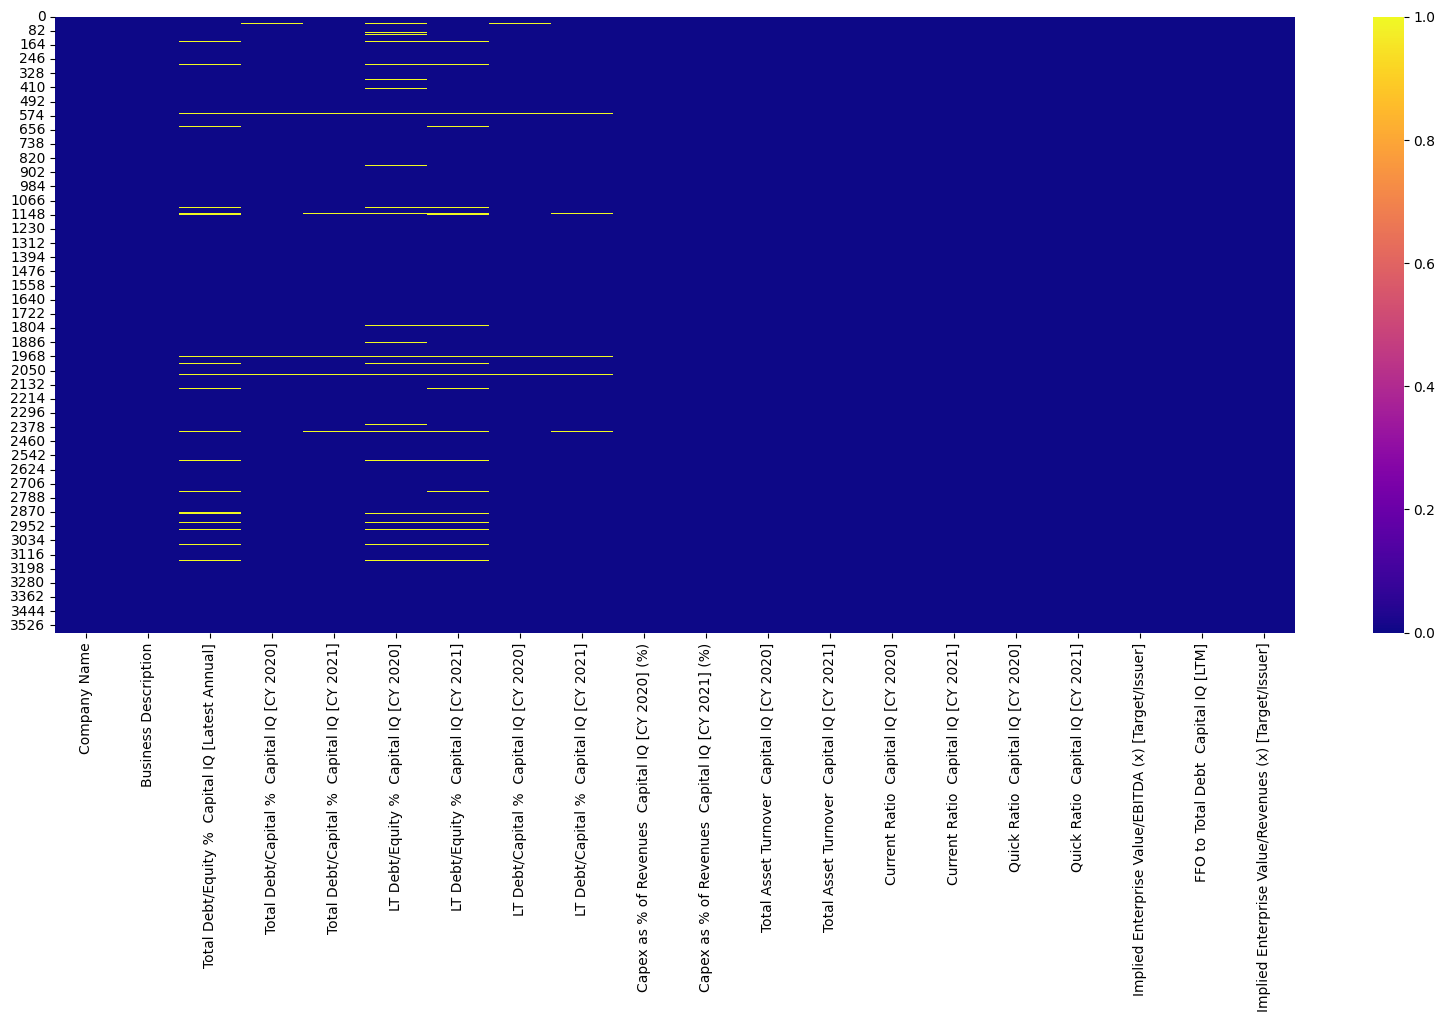

In [159]:
#Visualisons les valeurs nulles | en jaune les valeurs nulles 
fig2 = plt.subplots(figsize = (20, 8))
sns.heatmap(df_V4.isnull(), cmap='plasma')

In [160]:
# Les colonnes contenant des valeurs nulles à remplacer par des moyennes:
colonnes_na_a_remplacer = df_V4.isnull().sum()[df_V4.isnull().sum() >= 1].index
df_V4 [colonnes_na_a_remplacer].describe()

,Total Debt/Equity % Capital IQ [Latest Annual],Total Debt/Capital % Capital IQ [CY 2020],Total Debt/Capital % Capital IQ [CY 2021],LT Debt/Equity % Capital IQ [CY 2020],LT Debt/Equity % Capital IQ [CY 2021],LT Debt/Capital % Capital IQ [CY 2020],LT Debt/Capital % Capital IQ [CY 2021]
count,3473.000000,3562.000000,3557.000000,3481.000000,3475.000000,3562.000000,3557.000000
mean,136.488723,42.579571,39.312379,91.900819,99.979526,28.181750,25.344348
std,1496.882484,127.230809,41.465036,423.289245,1358.591787,107.755509,33.956446
min,0.001000,0.017000,0.009000,0.000000,0.000000,0.000000,0.000000
25%,20.900000,18.200000,17.700000,6.580000,6.330000,5.425000,4.980000
50%,53.500000,36.850000,35.700000,28.600000,27.900000,19.200000,19.000000
75%,104.700000,54.200000,53.000000,75.700000,72.050000,39.275000,38.000000
max,82025.900000,7077.000000,1408.200000,12275.500000,55978.300000,6084.900000,1240.900000


In [161]:
#Remplacons les valeurs nulles par la moyenne de chaque colonne
df_V4.fillna(df_V4.mean(), inplace = True)
print ('''Le nombre de valeurs nulles dans df_V4 après qu'on les a remlacer par la moyenne de chaque colonne est : ''', df_V4.isnull().sum().sum())

Le nombre de valeurs nulles dans df_V4 après qu'on les a remlacer par la moyenne de chaque colonne est :  0


C:\Users\hh\AppData\Local\Temp\ipykernel_14888\897428964.py:2: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



In [162]:
#Nombre de valeurs duppliquées dans la dataset df_V4
print ('Nombre de valeurs duppliquées dans la dataset df_V4 est : ', df_V4.duplicated().sum())

Nombre de valeurs duppliquées dans la dataset df_V4 est :  0


In [163]:
#Dans un premièr temps nous ne aurons pas besoin des colonnes d'Implied Entreprise value
EIV = df_V4[['Implied Enterprise Value/EBITDA (x) [Target/Issuer]','Implied Enterprise Value/Revenues (x) [Target/Issuer]']]
df_V5 = df_V4.drop(['Implied Enterprise Value/EBITDA (x) [Target/Issuer]','Implied Enterprise Value/Revenues (x) [Target/Issuer]'], axis = 1)
print ('La taille de df_V5 data après nettoyage de tout valeurs nulles', df_V5.shape)


La taille de df_V5 data après nettoyage de tout valeurs nulles (3568, 18)


In [164]:
#Exportation de la df_V5
#df_V5.to_excel('df_V5.xlsx', index = False)

In [165]:
#Nombre d'entreprise dans la data finale df_V5
print ('''Nombre d'entreprise dans la data finale df_V5 est: ''',  df_V5['Company Name'].value_counts().count())

Nombre d'entreprise dans la data finale df_V5 est:  3568


Nous allons supprimer la colonne company name parce qu'il jeux le role d'un index 'clè primaire' et n'ajoute aucunne info au modèle

In [166]:
#La colonne company name
company_name = df_V5['Company Name']
#Suppression de la colonne company name
df_V6 = df_V5.drop ('Company Name', axis = 1)

In [167]:
#df_V6['Business Description'].to_csv('Business_Description.txt', sep = '\t')

In [168]:
df_V6.shape

(3568, 17)

Pour la colonne Business Description, c'est une colonne texte, pour extraire de l'information de cette colonne, nous avons construit un vocabulaire, lignes par lignes de cette colonne, nous allons voir les mot de la ligne qui existe dans le vocabulaire.

In [169]:
#Importation du vocabulaire business
vocabulaire_business = pd.read_csv('vocabulaire_Business.T.txt')

Tokenization puis codage des mots de la colonne business description 

In [170]:
#Importation des bibliothèques
import nltk
import re
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

In [171]:
#La fonction vectorizer_coder (colonne, vocabulary) | input : colonne contenant des paragraphes et un vocabulaire sur lequel va se baser pour coder
#---------------------------------------------------> output : Dataframe contenant les mot du vocabulaire comme colonnes et les valeurs (1,0) 

def vectorizer_coder (colonne, vocabulaire):
    #vocabulaire_business est une dataframe de 0 lignes (shape : 0,1001)
    #Ajoutons n = len(colonne) lignes de valeurs 0 à la dataframe vocabulaire_business
    print ('Ajoutons n = len(colonne) lignes de valeurs 0 à la dataframe vocabulaire_business')
    copy_vocabulaire = vocabulaire
    for i in range (len (colonne)):
        copy_vocabulaire.loc[i] = [0]*len(copy_vocabulaire.columns)


    #La fonction vectorise d'abord la colonne | input : colonne --------> output : la ligne de chaque colonne vectoriser
    #download des stopwords
    nltk.download('stopwords')
    #Liste des stopwords
    liststopwords = stopwords.words("english")

    #appliquant le preprocesseing à la nouvelle colonne
    print ('''Entrain d'appliquer le preprocessing à la colonne''')    
    Business_description2 = []
    for description in colonne:
        #Enlever les ponctuations
        description = re.sub('[^a-zA-Z]', ' ',description)
        #Rendre tout les lettre en minuscule
        description = description.lower()
        #Split le text en mots
        description = description.split()
        #Enlever les stopwords
        description = [word for word in description if word not in liststopwords]
        #Reformant maintenant la phrase
        #description = ' '.join(description)
        #Appliquant le porterstemmer qui rend chaque mot en sa forme original
        #description = PorterStemmer().stem(description)
        #ajouter le mot à la nouvelle liste
        Business_description2.append(description)


    #-----------------------------------------------------------------------------------------------
    #La fonction qui vectorise une phrase                                                          |
    #la phrase doit etre déja passé par le preprocessing                                           |
    #def vectoriser (colonne):                                                                     |
        #return CountVectorizer().fit_transform(colonne).toarray()                                 |
    #-----------------------------------------------------------------------------------------------



    #Transformons Business_description2 en une dataframe
    print ('Entrain de transformer la colonne à une dataframe pour obtenir une colonne de description vectoriser')
    business_description_vectorizer = pd.DataFrame(columns = ['business_description_vectorizer'])
    for i in range (len(Business_description2)):
        business_description_vectorizer.loc[i] = [Business_description2[i]] 
    

    # Codons la colonne business_description_vectorizer vers la dataframe vocabulaire business 
    # Ligne par ligne de business_description_vectorizer, si un mot existe dans le vocabulaire 
    # business, nous allons mettre 1 dans la colonne et la ligne correspondant de 'vocabulaire_business', 
    # si non, nous allons mettre 0 
    print ('Entrain de coder la nouvelle colonne vectoriser vers le vocabulaire')

    for ligne in range (len(business_description_vectorizer)):
        print ('codage de la ', ligne, '  ème ligne')
    #ligne : la ligne de business_description_vectorizer
        for word in business_description_vectorizer['business_description_vectorizer'][ligne]:
            if word in copy_vocabulaire.columns:
                #word : un mot parmi les mots de la ligne
                #print ('ajoutons ', word, ' to vocabulary')
                #Si le mot existe dans le vocabulaire la cellule correspondant dans le vocabulaire prend 1
                copy_vocabulaire.at[ligne, word] = 1
 

    
    return copy_vocabulaire, business_description_vectorizer

In [172]:
[colonnes_business_description_coder, colonne_business_description_vectoriser] = vectorizer_coder(df_V6['Business Description'], vocabulaire_business)

Ajoutons n = len(colonne) lignes de valeurs 0 à la dataframe vocabulaire_business


KeyboardInterrupt: 

In [ ]:
colonnes_business_description_coder

,services,products,provides,offers,operates,founded,headquartered,management,limited,engages,...,geothermal,forwarding,eye,ecological,core,contracts,collaboration,cities,box,bottles
0,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,1,1,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3563,1,1,1,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3564,0,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3565,0,1,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3566,0,1,1,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Fusionons les deux dataframe df_V6 et celle contenant les nouvelles colonnes description coder
#df_V7 =pd.concat( [df_V6, colonnes_business_description_coder], axis = 1)
#Suppression de la colonne Business Description
df_V7 = df_V6.drop('Business Description', axis = 1)

In [ ]:
df_V7.head()

,Total Debt/Equity % Capital IQ [Latest Annual],Total Debt/Capital % Capital IQ [CY 2020],Total Debt/Capital % Capital IQ [CY 2021],LT Debt/Equity % Capital IQ [CY 2020],LT Debt/Equity % Capital IQ [CY 2021],LT Debt/Capital % Capital IQ [CY 2020],LT Debt/Capital % Capital IQ [CY 2021],Capex as % of Revenues Capital IQ [CY 2020] (%),Capex as % of Revenues Capital IQ [CY 2021] (%),Total Asset Turnover Capital IQ [CY 2020],Total Asset Turnover Capital IQ [CY 2021],Current Ratio Capital IQ [CY 2020],Current Ratio Capital IQ [CY 2021],Quick Ratio Capital IQ [CY 2020],Quick Ratio Capital IQ [CY 2021],FFO to Total Debt Capital IQ [LTM]
0,54.40,41.6,35.3,54.4,38.800,31.8,25.100,0.378,0.198,1.730,1.870,0.991,0.925,0.923,0.868,0.562
1,803.60,79.9,92.4,245.8,702.100,49.4,53.600,2.620,12.500,1.120,1.110,0.950,0.889,0.577,0.475,0.271
2,114.20,60.5,54.8,144.5,110.700,57.1,50.100,4.660,4.530,0.700,0.749,1.890,1.710,1.240,1.060,0.331
3,1.11,12.9,1.6,8.6,0.695,7.5,0.684,0.188,0.565,0.950,0.494,0.988,0.654,0.915,0.568,3.070
4,17.90,18.2,15.2,19.5,16.800,15.9,14.300,16.000,16.100,0.344,0.346,4.600,5.490,3.670,4.330,0.479


In [ ]:
#Pour une entreprise test il suffit d'appliquer le code suivant
#description_test = pd.DataFrame({ 'business description': [df_V6['Business Description'][0]]})
#[descriptioin_test_coder, descriptioin_test_vectoriser] = vectorizer_coder (description_test['business description'], vocabulaire_business)

**Normalisation des données**

In [ ]:
#Normalisons les données de df_V7
df_V8 = StandardScaler().fit_transform(df_V7)
#Mettons les données dans une dataframe 
df_V8 = pd.DataFrame(data = df_V8, columns = df_V7.columns)
df_V8.head()

,Total Debt/Equity % Capital IQ [Latest Annual],Total Debt/Capital % Capital IQ [CY 2020],Total Debt/Capital % Capital IQ [CY 2021],LT Debt/Equity % Capital IQ [CY 2020],LT Debt/Equity % Capital IQ [CY 2021],LT Debt/Capital % Capital IQ [CY 2020],LT Debt/Capital % Capital IQ [CY 2021],Capex as % of Revenues Capital IQ [CY 2020] (%),Capex as % of Revenues Capital IQ [CY 2021] (%),Total Asset Turnover Capital IQ [CY 2020],Total Asset Turnover Capital IQ [CY 2021],Current Ratio Capital IQ [CY 2020],Current Ratio Capital IQ [CY 2021],Quick Ratio Capital IQ [CY 2020],Quick Ratio Capital IQ [CY 2021],FFO to Total Debt Capital IQ [LTM]
0,-0.055593,-0.007707,-0.096928,-0.089707,-0.045637,0.033611,-0.007208,-0.529429,-0.531391,2.941723,3.034886,-0.414201,-0.406805,-0.255807,-0.246818,-0.017465
1,0.451786,0.293617,1.282457,0.368148,0.449151,0.197104,0.833517,-0.412316,0.126167,1.430371,1.236431,-0.430937,-0.420550,-0.426207,-0.424458,-0.017522
2,-0.015095,0.140988,0.374140,0.125824,0.007997,0.268633,0.730270,-0.305754,-0.299840,0.389768,0.382164,-0.047246,-0.107080,-0.099688,-0.160031,-0.017510
3,-0.091682,-0.233503,-0.911032,-0.199267,-0.074061,-0.192121,-0.727459,-0.539354,-0.511774,1.009175,-0.221265,-0.415426,-0.510277,-0.259747,-0.382421,-0.016972
4,-0.080312,-0.191805,-0.582491,-0.173192,-0.062048,-0.114090,-0.325799,0.286602,0.318591,-0.492267,-0.571490,1.058927,1.336183,1.097055,1.318050,-0.017481


In [ ]:
df_V8.describe()

,Total Debt/Equity % Capital IQ [Latest Annual],Total Debt/Capital % Capital IQ [CY 2020],Total Debt/Capital % Capital IQ [CY 2021],LT Debt/Equity % Capital IQ [CY 2020],LT Debt/Equity % Capital IQ [CY 2021],LT Debt/Capital % Capital IQ [CY 2020],LT Debt/Capital % Capital IQ [CY 2021],Capex as % of Revenues Capital IQ [CY 2020] (%),Capex as % of Revenues Capital IQ [CY 2021] (%),Total Asset Turnover Capital IQ [CY 2020],Total Asset Turnover Capital IQ [CY 2021],Current Ratio Capital IQ [CY 2020],Current Ratio Capital IQ [CY 2021],Quick Ratio Capital IQ [CY 2020],Quick Ratio Capital IQ [CY 2021],FFO to Total Debt Capital IQ [LTM]
count,3.568000e+03,3.568000e+03,3.568000e+03,3.568000e+03,3.568000e+03,3.568000e+03,3.568000e+03,3.568000e+03,3.568000e+03,3568.000000,3.568000e+03,3.568000e+03,3.568000e+03,3.568000e+03,3.568000e+03,3568.000000
mean,9.957157e-18,-3.385433e-17,4.580292e-17,1.344216e-17,1.991431e-18,-3.982863e-18,1.174945e-16,-5.376865e-17,-5.376865e-17,0.000000,-2.758133e-16,-1.891860e-17,-1.543359e-17,4.978579e-17,1.045502e-16,0.000000
std,1.000140e+00,1.000140e+00,1.000140e+00,1.000140e+00,1.000140e+00,1.000140e+00,1.000140e+00,1.000140e+00,1.000140e+00,1.000140,1.000140e+00,1.000140e+00,1.000140e+00,1.000140e+00,1.000140e+00,1.000140
min,-9.243330e-02,-3.348590e-01,-9.494659e-01,-2.198391e-01,-7.457952e-02,-2.617911e-01,-7.476364e-01,-5.491739e-01,-5.419740e-01,-1.339615,-1.385528e+00,-8.170767e-01,-7.565482e-01,-7.088948e-01,-6.387123e-01,-0.017575
25%,-7.773813e-02,-1.912151e-01,-5.184745e-01,-2.033932e-01,-6.951640e-02,-2.111872e-01,-6.005095e-01,-4.588057e-01,-4.505723e-01,-0.700388,-7.016414e-01,-4.235893e-01,-3.828462e-01,-4.227599e-01,-3.751891e-01,-0.017554
50%,-5.461080e-02,-4.468375e-02,-8.001834e-02,-1.475966e-01,-5.264865e-02,-8.250599e-02,-1.842029e-01,-3.031425e-01,-2.966327e-01,-0.180086,-1.715704e-01,-2.309274e-01,-2.139882e-01,-2.348761e-01,-2.133686e-01,-0.017527
75%,-1.661831e-02,9.083312e-02,3.288450e-01,-2.105274e-02,-1.665666e-02,1.023528e-01,3.733308e-01,4.109258e-02,3.529971e-02,0.452328,4.578888e-01,1.037817e-01,6.473711e-02,7.760686e-02,4.337445e-02,-0.017450
max,5.545780e+01,5.534297e+01,3.306871e+01,2.914481e+01,4.168232e+01,5.626319e+01,3.585784e+01,1.297472e+01,1.406626e+01,9.631315,1.037069e+01,1.599839e+01,2.176713e+01,1.913685e+01,2.526115e+01,59.720609


In [ ]:
#Fusionons les deux dataframe df_V8 et colonnes_business_description_coder
df_V9 = pd.concat( [df_V8, colonnes_business_description_coder], axis = 1 )
df_V9.head()

,Total Debt/Equity % Capital IQ [Latest Annual],Total Debt/Capital % Capital IQ [CY 2020],Total Debt/Capital % Capital IQ [CY 2021],LT Debt/Equity % Capital IQ [CY 2020],LT Debt/Equity % Capital IQ [CY 2021],LT Debt/Capital % Capital IQ [CY 2020],LT Debt/Capital % Capital IQ [CY 2021],Capex as % of Revenues Capital IQ [CY 2020] (%),Capex as % of Revenues Capital IQ [CY 2021] (%),Total Asset Turnover Capital IQ [CY 2020],...,geothermal,forwarding,eye,ecological,core,contracts,collaboration,cities,box,bottles
0,-0.055593,-0.007707,-0.096928,-0.089707,-0.045637,0.033611,-0.007208,-0.529429,-0.531391,2.941723,...,0,0,0,0,0,0,0,0,0,0
1,0.451786,0.293617,1.282457,0.368148,0.449151,0.197104,0.833517,-0.412316,0.126167,1.430371,...,0,1,0,0,0,0,0,0,0,0
2,-0.015095,0.140988,0.374140,0.125824,0.007997,0.268633,0.730270,-0.305754,-0.299840,0.389768,...,0,0,0,0,0,0,0,0,0,0
3,-0.091682,-0.233503,-0.911032,-0.199267,-0.074061,-0.192121,-0.727459,-0.539354,-0.511774,1.009175,...,0,0,0,0,0,0,0,0,0,0
4,-0.080312,-0.191805,-0.582491,-0.173192,-0.062048,-0.114090,-0.325799,0.286602,0.318591,-0.492267,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#df_V9.to_excel('df_V9.xlsx', index = False)

#### clustering sur la data df_V9

In [3]:
#Importation de la data df_V9 
df_Vf = pd.read_excel('Data/df_V9.xlsx')

In [5]:
#Les colonnes principales
columns = df_Vf.columns [0:16]

Index(['Total Debt/Equity %  Capital IQ [Latest Annual]',
       'Total Debt/Capital %  Capital IQ [CY 2020]',
       'Total Debt/Capital %  Capital IQ [CY 2021]',
       'LT Debt/Equity %  Capital IQ [CY 2020]',
       'LT Debt/Equity %  Capital IQ [CY 2021]',
       'LT Debt/Capital %  Capital IQ [CY 2020]',
       'LT Debt/Capital %  Capital IQ [CY 2021]',
       'Capex as % of Revenues  Capital IQ [CY 2020] (%)',
       'Capex as % of Revenues  Capital IQ [CY 2021] (%)',
       'Total Asset Turnover  Capital IQ [CY 2020]',
       'Total Asset Turnover  Capital IQ [CY 2021]',
       'Current Ratio  Capital IQ [CY 2020]',
       'Current Ratio  Capital IQ [CY 2021]',
       'Quick Ratio  Capital IQ [CY 2020]',
       'Quick Ratio  Capital IQ [CY 2021]',
       'FFO to Total Debt  Capital IQ [LTM]'],
      dtype='object')

##### Model KMeans

In [ ]:
#Choix du n_clusters
Nbr = [i for i in range (2, 20)]
silhouette = []
inertia = []
for i in Nbr:
    model = KMeans (init = 'k-means++', n_clusters= i, n_init = 12)
    model.fit(debt_capital)
    ss = silhouette_score (debt_capital, model.labels_)
    inertia.append(model.inertia_)
    silhouette.append(ss)

In [ ]:
#silhouette score en fonction du nombre de clusters
fig2 = px.line( x = Nbr, y = silhouette, width = 800, height = 500 )
fig2.update_layout( title = 'silhouette score en fonction du nombre de clusters',
                   xaxis_title = 'nbr of clusters',
                    yaxis_title = 'silhouette_score' )

In [ ]:
#Elbow graph
fig3 = px.line(x = Nbr, y = inertia, width = 800, height = 500)
fig3.update_layout( title = 'Elbow graph',
                   xaxis_title = 'nbr of clusters',
                    yaxis_title = 'inertia' )

Cherchons la meilleur combinaison des paramètres 'init' 'n_clusters' 'n_init'

In [ ]:
#SearchGrid
#On aura besoin de la metrique silhouette 
'''silhouette_scorer = make_scorer(silhouette_score, metric='euclidean', greater_is_better=True)


params = { 'init' : ['k-means++', 'random'],
          'n_clusters': [i for i in range (3,10)],
           'n_init' : [12,15] }
model = KMeans ()
grid_search = GridSearchCV(estimator = model, param_grid = params, cv=5, scoring = 'sdjq')
grid_search.fit(debt_capital)
print ('Best parameters : ', grid_search.best_params_)
print ('Best score : ', grid_search.best_score_)'''
#On n'arrive pas à trouver fonction de scoring convenable donc pas de search grid pour le clustering 

"silhouette_scorer = make_scorer(silhouette_score, metric='euclidean', greater_is_better=True)\n\n\nparams = { 'init' : ['k-means++', 'random'],\n          'n_clusters': [i for i in range (3,10)],\n           'n_init' : [12,15] }\nmodel = KMeans ()\ngrid_search = GridSearchCV(estimator = model, param_grid = params, cv=5, scoring = 'sdjq')\ngrid_search.fit(debt_capital)\nprint ('Best parameters : ', grid_search.best_params_)\nprint ('Best score : ', grid_search.best_score_)"

In [ ]:
#initialisation du model
model_kmeans = KMeans (init = 'k-means++', n_clusters = 5, n_init = 12)
#Entrainement du model
model_kmeans.fit(debt_capital)
#Label of each row
kmeans_labels = model_kmeans.labels_
kmeans_labels = pd.DataFrame(kmeans_labels, columns = ['labels'])
kmeans_labels.value_counts()

labels
0         1985
4         1550
3           30
2            2
1            1
dtype: int64

In [ ]:
debt_capital_label = pd.concat( [debt_capital, kmeans_labels], axis = 1 )
debt_capital_label

,Total Debt/Capital % Capital IQ [CY 2020],Total Debt/Capital % Capital IQ [CY 2021],labels
0,-0.007707,-0.096928,0
1,0.293617,1.282457,4
2,0.140988,0.374140,4
3,-0.233503,-0.911032,0
4,-0.191805,-0.582491,0
...,...,...,...
3563,0.187406,0.497343,4
3564,0.426577,1.364592,4
3565,-0.248451,-0.805705,0
3566,-0.006920,0.277511,4


In [ ]:
#Cluster centers
kmeans_cluster_centers = model_kmeans.cluster_centers_
kmeans_cluster_centers

array([[-0.16561559, -0.47163323],
       [55.34297081, -0.73589071],
       [ 4.78278529, 27.08493486],
       [ 1.86511419,  4.54379117],
       [ 0.13373308,  0.48034857]])

In [ ]:
#Visualisation des différentes clusters
px.scatter( debt_capital_label, 
           x = 'Total Debt/Capital %  Capital IQ [CY 2020]', 
           y = 'Total Debt/Capital %  Capital IQ [CY 2021]', 
           color= 'labels', width = 900, height = 500 )

In [ ]:
#px.scatter(x = kmeans_cluster_centers[:,0], y = kmeans_cluster_centers[:, 1])

In [ ]:
#Mesure de la silhoutte score : à quel point les points d'un cluster sont similaire les uns des autres et différents des points des autres clusters
#L'indice de silhoutte proche de 1 indique une bonne qualité du model, -1 indique un clustering de faible qualité
#Une valeur négative de l'indice de silhouette indique que les points sont plus similaires aux points d'autres clusters qu'à ceux de leur propre cluster.
#un indice de silhouette proche de 0 indique une mauvaise séparation entre les clusters

indice_silhoutte= silhouette_score(debt_capital, model_kmeans.labels_ )
print (''' l'indice de silhouette ''', indice_silhoutte)

 l'indice de silhouette  0.540175132131792


In [ ]:
#Inertia
Inertia = model_kmeans.inertia_
print ('inertia ', Inertia)

inertia  954.5918689477692


In [ ]:
rapport_silhouette_inertia = indice_silhoutte / Inertia
print ('rapport_silhouette_inertia : ', rapport_silhouette_inertia)

rapport_silhouette_inertia :  0.0005658702422504584


##### Model MiniBatchKMeans 

In [ ]:
#Initialisation du model
model_MiniBatchKMeans = MiniBatchKMeans(n_clusters = 5, random_state= 40)
model_MiniBatchKMeans.fit(debt_capital)
#Entrainnement du model
model_MiniBatchKMeans_labels = model_MiniBatchKMeans.labels_
model_MiniBatchKMeans_labels = pd.DataFrame(model_MiniBatchKMeans_labels, columns = ['labels'])
model_MiniBatchKMeans_labels.value_counts()

c:\Users\hh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



labels
1         1106
3         1105
4          861
2          459
0           37
dtype: int64

In [ ]:
#Concatination entre debt_capital et labels
debt_capital_label2 = pd.concat( [debt_capital, model_MiniBatchKMeans_labels], axis = 1 )
debt_capital_label2.head()

,Total Debt/Capital % Capital IQ [CY 2020],Total Debt/Capital % Capital IQ [CY 2021],labels
0,-0.007707,-0.096928,3
1,0.293617,1.282457,2
2,0.140988,0.374140,4
3,-0.233503,-0.911032,1
4,-0.191805,-0.582491,1


In [ ]:
#Visualisation des clusters
fig4 = px.scatter( debt_capital_label2, 
                  x = 'Total Debt/Capital %  Capital IQ [CY 2020]', 
                  y = 'Total Debt/Capital %  Capital IQ [CY 2021]',
                  color= 'labels', width = 900, height = 500  )
fig4.show()

In [ ]:
print ( 'Le silhouette score de model MiniBatchKMeans', silhouette_score(debt_capital, model_MiniBatchKMeans.labels_))

Le silhouette score de model MiniBatchKMeans 0.48049223637979294


In [ ]:
print ('Inertia du model MiniBatchKMeans :', model_MiniBatchKMeans.inertia_)

Inertia du model MiniBatchKMeans : 4695.114153175125


In [ ]:
#Le diagramme d'ELBOW
#Ineritia
Inertia = []
Nbr2 = [i for i in range ( 2, 30 )]
for i in Nbr2 :
    model2 = MiniBatchKMeans( n_clusters = i, random_state = 40 )
    model2.fit (debt_capital)
    Inertia.append(model2.inertia_)


c:\Users\hh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\hh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\hh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\hh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\hh\

In [ ]:
#Diagramme d'ELBOW
fig5 = px.line( x = Nbr2, y=Inertia, width= 700, height = 500 ) 
fig5.update_layout ( xaxis_title = 'nombre de clusters', yaxis_title = 'Inertia' )

In [36]:
#Importation du package 
from sklearn.datasets import make_blobs

In [37]:
#Imortation de la dataset
X, y = make_blobs( n_samples = 1000, n_features = 2, centers = 5, random_state = 40 )
X.shape 

(1000, 2)

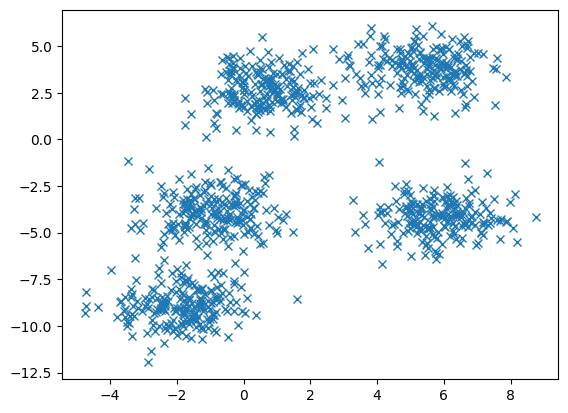

In [38]:
#Visualisation des blobs X
plt.plot ( X[ :,0 ], X[:, 1], 'x' )

In [39]:
#Diagramme d'elbow
#Ineritia
Inertia = []
Nbr2 = [i for i in range ( 2, 20 )]
for i in Nbr2 :
    model3 = KMeans( n_clusters = i, n_init = 12)
    model3.fit (X)
    Inertia.append(model3.inertia_)

In [40]:
#Diagramme d'ELBOW
fig5 = px.line( x = Nbr2, y=Inertia, width= 700, height = 500 ) 
fig5.update_layout ( xaxis_title = 'nombre de clusters', yaxis_title = 'Inertia' )

In [41]:
#Diagramme silhouette en fonction du n_clusters
#Silhouette
silhouette = []
for i in Nbr:
    model = KMeans ( n_clusters = i, n_init = 12 )
    model.fit(X)
    silhouette.append( silhouette_score(X, model.labels_) )
    #print ('Términé pour n_clusters=', i)

In [43]:
#Diagramme silhouette
fig6 = px.line (x = Nbr, y = silhouette, width = 700, height = 500)
fig6.update_layout( xaxis_title = 'n_clusters', yaxis_title = 'Silhouette' )
fig6.show()

In [ ]:
X_1 = pd.DataFrame( X, columns = [ 'F1', 'F2'] )
X_1

,F1,F2
0,-3.694310,-8.720130
1,-2.079844,-9.019548
2,1.353717,4.024695
3,-0.037919,-9.207529
4,5.216385,3.279994
...,...,...
995,6.670918,3.967385
996,5.152170,3.407921
997,-3.249875,-3.118012
998,-0.601448,2.406968


In [ ]:
#Initialisation du model 
model_kmeans_test = KMeans (n_clusters = 20, n_init = 12)
model_kmeans_test.fit (X)
model_kmeans_test_labels = model_kmeans_test.labels_
model_kmeans_test_labels = pd.DataFrame( model_kmeans_test_labels, columns = ['Labels'] )
model_kmeans_test_labels.value_counts()

Labels
5         71
4         66
8         65
0         62
13        62
6         60
17        57
16        55
1         54
2         51
10        49
12        47
11        44
14        43
19        40
15        39
7         39
3         36
9         31
18        29
dtype: int64

In [ ]:
blobs_labels = pd.concat( [X_1, model_kmeans_test_labels], axis = 1 )
blobs_labels.head()

,F1,F2,Labels
0,-3.694310,-8.720130,15
1,-2.079844,-9.019548,6
2,1.353717,4.024695,5
3,-0.037919,-9.207529,7
4,5.216385,3.279994,10


In [ ]:
#Visualisation des clusters 
px.scatter( blobs_labels,
            x = 'F1' , 
            y = 'F2',
            color = 'Labels', width = 700, height = 500)

In [ ]:
print ('silhouette score :', silhouette_score(X_1, model_kmeans_test.labels_)) 
print ('inertai :', model_kmeans_test.inertia_)
print ('rapport silhouette/Inertai :', silhouette_score(X_1, model_kmeans_test.labels_)/model_kmeans_test.inertia_)

silhouette score : 0.33455604905735153
inertai : 662.9295517015674
rapport silhouette/Inertai : 0.0005046630493370424


##### Clustering sur df_Vf

In [1]:
#Importation de la data df_V9 
df_Vf = pd.read_excel('Data/df_V9.xlsx')

NameError: name 'pd' is not defined

In [16]:
#Les colonnes principales
columns  = df_Vf.columns
columns = columns[0:16]
columns

Index(['Total Debt/Equity %  Capital IQ [Latest Annual]',
       'Total Debt/Capital %  Capital IQ [CY 2020]',
       'Total Debt/Capital %  Capital IQ [CY 2021]',
       'LT Debt/Equity %  Capital IQ [CY 2020]',
       'LT Debt/Equity %  Capital IQ [CY 2021]',
       'LT Debt/Capital %  Capital IQ [CY 2020]',
       'LT Debt/Capital %  Capital IQ [CY 2021]',
       'Capex as % of Revenues  Capital IQ [CY 2020] (%)',
       'Capex as % of Revenues  Capital IQ [CY 2021] (%)',
       'Total Asset Turnover  Capital IQ [CY 2020]',
       'Total Asset Turnover  Capital IQ [CY 2021]',
       'Current Ratio  Capital IQ [CY 2020]',
       'Current Ratio  Capital IQ [CY 2021]',
       'Quick Ratio  Capital IQ [CY 2020]',
       'Quick Ratio  Capital IQ [CY 2021]',
       'FFO to Total Debt  Capital IQ [LTM]'],
      dtype='object')

---------------------------------------------------------------------------------------

Supprimons les outliers

In [100]:
#Suppression des outliers 
df_Vf_2 = df_Vf
for column in columns:
    index_a_supprimer = df_Vf_2.sort_values( by = column, ascending = False )[0:2].index
    df_Vf_2 = df_Vf_2.drop( df_Vf.index[index_a_supprimer] )

print ('''Nombre d'outliers supprimées''', df_Vf.shape[0] - df_Vf_2.shape[0] )

Nombre d'outliers supprimées 32


In [101]:
px.box( x= df_Vf_2['Total Debt/Equity %  Capital IQ [Latest Annual]'] )

----------------------------------------------------

Kmeans 

In [102]:
#Data d'input 
X = df_Vf_2

In [103]:
#Diagramme d'elbow
#Calcule d'inertia et silhouette
#inertia = []
#silhouette = []
Nbr = [i for i in range (2, 30)]
for i in Nbr:
    # Initialisation et entrainnement du model
    model = KMeans ( init= 'k-means++', n_clusters = i, n_init = 12 )
    model.fit(X)
    #Calcule d'inertia
    inertia.append (model.inertia_)
    #Calcule de la silhouette score 
    silhouette.append( silhouette_score(X, model.labels_) )
    print ('''Términé pour n_clusters =''', i)

Términé pour n_clusters = 2
Términé pour n_clusters = 3
Términé pour n_clusters = 4
Términé pour n_clusters = 5
Términé pour n_clusters = 6
Términé pour n_clusters = 7
Términé pour n_clusters = 8
Términé pour n_clusters = 9
Términé pour n_clusters = 10
Términé pour n_clusters = 11
Términé pour n_clusters = 12
Términé pour n_clusters = 13
Términé pour n_clusters = 14
Términé pour n_clusters = 15
Términé pour n_clusters = 16
Términé pour n_clusters = 17
Términé pour n_clusters = 18
Términé pour n_clusters = 19
Términé pour n_clusters = 20
Términé pour n_clusters = 21
Términé pour n_clusters = 22
Términé pour n_clusters = 23
Términé pour n_clusters = 24
Términé pour n_clusters = 25
Términé pour n_clusters = 26
Términé pour n_clusters = 27
Términé pour n_clusters = 28
Términé pour n_clusters = 29


In [104]:
#Diagramme d'ELBOW
fig7 =  px.line( x = [i for i in range(2, len(inertia)+2)], y = inertia, width = 700, height = 500 )
fig7.update_layout ( xaxis_title = 'n_clusters', yaxis_title = 'inertia' )
fig7.show()

In [105]:
#Diagramme silhouette 
fig6 = px.line (x = [i for i in range(2, len(silhouette)+2)], y = silhouette, width = 700, height = 500)
fig6.update_layout( xaxis_title = 'n_clusters', yaxis_title = 'Silhouette' )
fig6.show()

les meilleur n_clusters d'après le diagramme d'elbow [12, 13, 14, 15, 16]

In [233]:
#Initialisation du modèle 
n_clusters = 4
model_kmeans = KMeans ( n_clusters = n_clusters, n_init = 12 )
model_kmeans.fit (X)
model_kmeans_labels = model_kmeans.labels_
model_kmeans_labels = pd.DataFrame( model_kmeans_labels, columns = ['labels'] )
model_kmeans_labels.value_counts()

labels
2         1644
1         1493
0          222
3          177
dtype: int64

In [234]:
#La silhouette score
print ('Pour n_clusters=', n_clusters, ' silhouette score :', silhouette_score ( X, model_kmeans.labels_ ))
print ('Pour n_clusters=', n_clusters, ' Inertia :', model_kmeans.inertia_)

Pour n_clusters= 4  silhouette score : 0.11088317925634825
Pour n_clusters= 4  Inertia : 88736.43350837374


In [224]:
#Concatination data X avec labels
X_label = pd.concat( [X, model_kmeans_labels], axis = 1 )
X_label.head()

,Total Debt/Equity % Capital IQ [Latest Annual],Total Debt/Capital % Capital IQ [CY 2020],Total Debt/Capital % Capital IQ [CY 2021],LT Debt/Equity % Capital IQ [CY 2020],LT Debt/Equity % Capital IQ [CY 2021],LT Debt/Capital % Capital IQ [CY 2020],LT Debt/Capital % Capital IQ [CY 2021],Capex as % of Revenues Capital IQ [CY 2020] (%),Capex as % of Revenues Capital IQ [CY 2021] (%),Total Asset Turnover Capital IQ [CY 2020],...,forwarding,eye,ecological,core,contracts,collaboration,cities,box,bottles,labels
0,-0.055593,-0.007707,-0.096928,-0.089707,-0.045637,0.033611,-0.007208,-0.529429,-0.531391,2.941723,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1,0.451786,0.293617,1.282457,0.368148,0.449151,0.197104,0.833517,-0.412316,0.126167,1.430371,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
2,-0.015095,0.140988,0.374140,0.125824,0.007997,0.268633,0.730270,-0.305754,-0.299840,0.389768,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
3,-0.091682,-0.233503,-0.911032,-0.199267,-0.074061,-0.192121,-0.727459,-0.539354,-0.511774,1.009175,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
4,-0.080312,-0.191805,-0.582491,-0.173192,-0.062048,-0.114090,-0.325799,0.286602,0.318591,-0.492267,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [191]:
px.scatter (X_label,
            x = X_label.iloc[:,3], 
            y = X_label.iloc[:,4], 
            color= 'labels', width = 900, height = 500 )

In [192]:
#Correlations:
correlations = X_label.corr()['labels']

In [194]:
correlations[correlations > 0.01]

Total Debt/Equity %  Capital IQ [Latest Annual]    0.025009
LT Debt/Equity %  Capital IQ [CY 2020]             0.017202
LT Debt/Equity %  Capital IQ [CY 2021]             0.029302
LT Debt/Capital %  Capital IQ [CY 2020]            0.023181
LT Debt/Capital %  Capital IQ [CY 2021]            0.016187
Current Ratio  Capital IQ [CY 2020]                0.012365
Current Ratio  Capital IQ [CY 2021]                0.017219
Quick Ratio  Capital IQ [CY 2020]                  0.013425
Quick Ratio  Capital IQ [CY 2021]                  0.013008
document                                           0.028766
optic                                              0.011678
labels                                             1.000000
Name: labels, dtype: float64

------------------------------------------------------------------------------------------

Clustering using minibatchkmeans

In [108]:
#Diagramme d'ELBOW
#Calcule d'inertia et silhouette
inertia = []
silhouette = []
Nbr = [i for i in range (2, 40)]
for i in Nbr:
    # Initialisation et entrainnement du model
    model = MiniBatchKMeans ( n_clusters = i, random_state = 12 )
    model.fit(X)
    #Calcule d'inertia
    inertia.append (model.inertia_)
    #Calcule de la silhouette score 
    silhouette.append( silhouette_score(X, model.labels_) )
    print ('''Términé pour n_clusters =''', i)

c:\Users\hh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Términé pour n_clusters = 2


c:\Users\hh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Términé pour n_clusters = 3


c:\Users\hh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Términé pour n_clusters = 4


c:\Users\hh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Términé pour n_clusters = 5


c:\Users\hh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Términé pour n_clusters = 6


c:\Users\hh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Términé pour n_clusters = 7


c:\Users\hh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Términé pour n_clusters = 8


c:\Users\hh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Términé pour n_clusters = 9


c:\Users\hh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Términé pour n_clusters = 10


c:\Users\hh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Términé pour n_clusters = 11


c:\Users\hh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Términé pour n_clusters = 12


c:\Users\hh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Términé pour n_clusters = 13


c:\Users\hh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Términé pour n_clusters = 14


c:\Users\hh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Términé pour n_clusters = 15


c:\Users\hh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Términé pour n_clusters = 16


c:\Users\hh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Términé pour n_clusters = 17


c:\Users\hh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Términé pour n_clusters = 18


c:\Users\hh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Términé pour n_clusters = 19


c:\Users\hh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Términé pour n_clusters = 20


c:\Users\hh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Términé pour n_clusters = 21


c:\Users\hh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Términé pour n_clusters = 22


c:\Users\hh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Términé pour n_clusters = 23


c:\Users\hh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Términé pour n_clusters = 24


c:\Users\hh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Términé pour n_clusters = 25


c:\Users\hh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Términé pour n_clusters = 26


c:\Users\hh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Términé pour n_clusters = 27


c:\Users\hh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Términé pour n_clusters = 28


c:\Users\hh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Términé pour n_clusters = 29


c:\Users\hh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Términé pour n_clusters = 30


c:\Users\hh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Términé pour n_clusters = 31


c:\Users\hh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Términé pour n_clusters = 32


c:\Users\hh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Términé pour n_clusters = 33


c:\Users\hh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Términé pour n_clusters = 34


c:\Users\hh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Términé pour n_clusters = 35


c:\Users\hh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Términé pour n_clusters = 36


c:\Users\hh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Términé pour n_clusters = 37


c:\Users\hh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Términé pour n_clusters = 38


c:\Users\hh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Términé pour n_clusters = 39


In [110]:
#Diagramme d'ELBOW
fig8 =  px.line( x = [i for i in range(2, len(inertia)+2)], y = inertia, width = 700, height = 500 )
fig8.update_layout ( xaxis_title = 'n_clusters', yaxis_title = 'inertia' )
fig8.show()

In [111]:
#Diagramme silhouette 
fig6 = px.line (x = [i for i in range(2, len(silhouette)+2)], y = silhouette, width = 700, height = 500)
fig6.update_layout( xaxis_title = 'n_clusters', yaxis_title = 'Silhouette' )
fig6.show()

In [205]:
model_MiniBatch = MiniBatchKMeans ( n_clusters = 2, random_state = )
model_MiniBatch.fit(X)
model_MiniBatch_labels = pd.DataFrame ( model_MiniBatch.labels_, columns = ['labels '] )
model_MiniBatch_labels.value_counts ()

c:\Users\hh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



labels 
1          3535
0             1
dtype: int64

In [204]:
print ('Silhouette score : ', silhouette_score ( X, model_MiniBatch.labels_ ))

Silhouette score :  0.09389878955540347


----------------------------------------------------------------------

Performing DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) : DBSCAN est une méthode de clustering basée sur la densité qui est capable de détecter et de traiter les outliers. Elle attribue chaque point à un cluster en fonction de la densité locale de ses voisins. Les points qui sont isolés ou qui ont une densité inférieure à un seuil sont considérés comme des outliers.
`eps` correspond au rayon du voisinage autour de chaque point, et `min_samples` correspond au nombre minimum de points requis pour former un cluster.

In [136]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [159]:
#Déterminons quelle valeur à donner à 'eps'
k = 10
nn = NearestNeighbors( n_neighbors = k )
nn.fit (X)
distances, indices = nn.kneighbors(X)
distances = np.sort(distances[:,k-1], axis=0)

# Tracer le k-distance plot
px.line ( y = distances, width = 700, height = 500)

In [214]:
model_DBSCAN = DBSCAN( eps = 8.5, min_samples = 5 )
model_DBSCAN.fit (X)
model_DBSCAN_labels =  pd.DataFrame (model_DBSCAN.labels_, columns = ['labels'])
model_DBSCAN_labels.value_counts()

labels
 0        3485
-1          51
dtype: int64

In [215]:
print ( "Le silouette score :", silhouette_score (X, model_DBSCAN.labels_) )

Le silouette score : 0.39653327966584


In [218]:
X_label = pd.concat( [X , model_DBSCAN_labels], axis = 1 )
X_label.head ()

,Total Debt/Equity % Capital IQ [Latest Annual],Total Debt/Capital % Capital IQ [CY 2020],Total Debt/Capital % Capital IQ [CY 2021],LT Debt/Equity % Capital IQ [CY 2020],LT Debt/Equity % Capital IQ [CY 2021],LT Debt/Capital % Capital IQ [CY 2020],LT Debt/Capital % Capital IQ [CY 2021],Capex as % of Revenues Capital IQ [CY 2020] (%),Capex as % of Revenues Capital IQ [CY 2021] (%),Total Asset Turnover Capital IQ [CY 2020],...,forwarding,eye,ecological,core,contracts,collaboration,cities,box,bottles,labels
0,-0.055593,-0.007707,-0.096928,-0.089707,-0.045637,0.033611,-0.007208,-0.529429,-0.531391,2.941723,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.451786,0.293617,1.282457,0.368148,0.449151,0.197104,0.833517,-0.412316,0.126167,1.430371,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.015095,0.140988,0.374140,0.125824,0.007997,0.268633,0.730270,-0.305754,-0.299840,0.389768,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.091682,-0.233503,-0.911032,-0.199267,-0.074061,-0.192121,-0.727459,-0.539354,-0.511774,1.009175,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.080312,-0.191805,-0.582491,-0.173192,-0.062048,-0.114090,-0.325799,0.286602,0.318591,-0.492267,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


---------------------------------------------------------------------------------

Performing PCA to data

In [208]:
from sklearn.decomposition import PCA

In [209]:
#Initialisation du PCA
pca = PCA(n_components = 2)
#Transformation de la data X
X_pca = pca.fit_transform(X)

In [211]:
#Tronsformation de X_pca to dataframe
X_pca_df = pd.DataFrame ( X_pca, columns = ['x1', 'x2'] )
X_pca_df

,x1,x2
0,0.531917,-4.236719
1,-0.939224,-1.993675
2,-0.235335,-0.322196
3,0.050039,-0.776238
4,2.105002,1.892496
...,...,...
3531,0.348389,-1.944134
3532,0.696985,-0.168055
3533,-0.829500,-1.271052
3534,2.468334,-2.770604


In [235]:
#Ajoutons labels X_pca_df
labels = model_kmeans_labels
X_pca_label = pd.concat ( [X_pca_df, labels], axis = 1 )
X_pca_label


,x1,x2,labels
0,0.531917,-4.236719,2
1,-0.939224,-1.993675,2
2,-0.235335,-0.322196,1
3,0.050039,-0.776238,1
4,2.105002,1.892496,3
...,...,...,...
3531,0.348389,-1.944134,2
3532,0.696985,-0.168055,2
3533,-0.829500,-1.271052,2
3534,2.468334,-2.770604,2


In [236]:
#Visualisation des clusters
px.scatter ( X_pca_label, x = 'x1', y = 'x2' , color = 'labels', width = 700, height = 500 )

In [237]:
print (' silhouette score du model avec la X_pca :', silhouette_score ( X_pca_df, labels ))

c:\Users\hh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



 silhouette score du model avec la X_pca : 0.09309636413474692
